In [2]:
# importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# loading dataset
df = pd.read_csv('Literacy Data 2011.csv')

In [6]:
# display top 5 rows
df.head()

,Unnamed: 0,District,State,Literacy
0,1,Thane,Maharashtra,84.53
1,2,North Twenty Four Parganas,West Bengal,84.06
2,3,Bangalore,Karnataka,87.67
3,4,Pune,Maharashtra,86.15
4,5,Mumbai Suburban,Maharashtra,89.91


In [8]:
# checking for unique values
distinct_district = df['District'].nunique()
print(distinct_district)

634


In [10]:
#checking for unique values
distinct_state = df['State'].nunique()
print(distinct_state)

35


In [12]:
# converting 35 distinct states in categorical data
# using Categorical function
# Convert 'State' column to categorical type
df['State'] = pd.Categorical(df['State'])
# Get the numerical codes (integer values) for each state
df['State Code'] = df['State'].cat.codes
print(df.head())

   Unnamed: 0                     District         State  Literacy  State Code
0           1                        Thane   Maharashtra     84.53          20
1           2   North Twenty Four Parganas   West Bengal     84.06          34
2           3                    Bangalore     Karnataka     87.67          16
3           4                         Pune   Maharashtra     86.15          20
4           5              Mumbai Suburban   Maharashtra     89.91          20


In [14]:
# dropping non numerical columns
df.drop(columns=['State', 'District'], inplace=True)

In [16]:
df

,Unnamed: 0,Literacy,State Code
0,1,84.53,20
1,2,84.06,34
2,3,87.67,16
3,4,86.15,20
4,5,89.91,20
...,...,...,...
635,636,78.06,0
636,637,59.99,2
637,638,76.81,13
638,639,56.46,2


In [47]:
# random 10 rows from the dataset
# using sample function
random_rows = df.sample(n=10)

In [20]:
print(random_rows)

     Unnamed: 0  Literacy  State Code
135         136     81.48          20
589         590     73.08          24
15           16     81.80          34
554         555     59.23          14
469         470     65.27          32
279         280     74.63          30
143         144     86.57           9
537         538     68.49          14
27           28     88.39          20
275         276     86.16          30


In [22]:
# shape of the dataset
df.shape

(640, 3)

In [24]:
# Non-null count for each column
non_null_count = df.count()

# Data type of each column
data_types = df.dtypes

# Print results
print("Non-null count:\n", non_null_count)
print("\nData types:\n", data_types)

Non-null count:
 Unnamed: 0    640
Literacy      640
State Code    640
dtype: int64

Data types:
 Unnamed: 0      int64
Literacy      float64
State Code       int8
dtype: object


In [26]:
# overall stats
df.describe()

,Unnamed: 0,Literacy,State Code
count,640.000000,640.000000,640.000000
mean,320.500000,72.308422,18.639063
std,184.896367,10.488816,10.243180
min,1.000000,36.100000,0.000000
25%,160.750000,65.095000,11.000000
50%,320.500000,72.170000,19.000000
75%,480.250000,79.962500,28.000000
max,640.000000,97.910000,34.000000


In [55]:
# null values in percentage
df.isnull().sum()/(len(df))*100

Unnamed: 0    0.0
Literacy      0.0
State Code    0.0
dtype: float64

In [30]:
# correlations between variables
df.corr()

,Unnamed: 0,Literacy,State Code
Unnamed: 0,1.000000,0.008753,-0.143790
Literacy,0.008753,1.000000,0.130871
State Code,-0.143790,0.130871,1.000000


            State Code  Literacy
State Code    1.000000  0.130871
Literacy      0.130871  1.000000


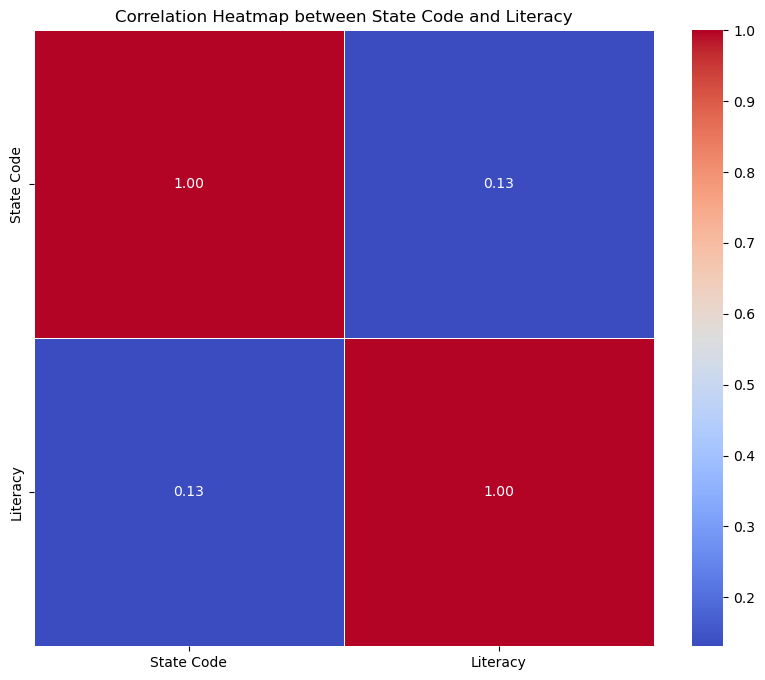

In [57]:
# Calculate the correlation matrix between 'State Code' and 'Literacy' columns
correlation_matrix = df[['State Code', 'Literacy']].corr()
print(correlation_matrix)
# Heatmap to show correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Display the plot with a title
plt.title('Correlation Heatmap between State Code and Literacy')
plt.show()

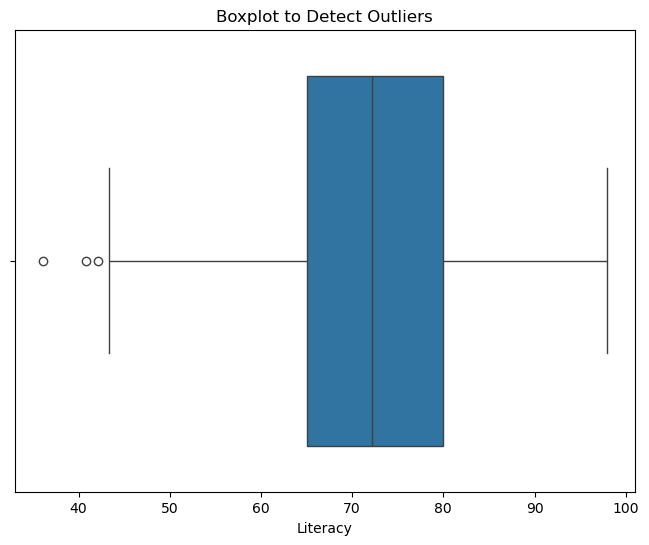

In [34]:
# Boxplot to visualize potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Literacy'])  # Replace 'Literacy' with the column you want to check
plt.title('Boxplot to Detect Outliers')
plt.show()

In [36]:
# Calculate IQR for removing outliers
Q1 = df['Literacy'].quantile(0.25)  # First quartile (25%)
Q3 = df['Literacy'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile Range

In [49]:
# Calculate the bounds to define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

42.79374999999999
102.26375000000002


In [40]:
# Remove outliers by filtering data
df_cleaned = df[(df['Literacy'] >= lower_bound) & (df['Literacy'] <= upper_bound)]

In [42]:
# Show the cleaned DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")

Original DataFrame size: (640, 3)
Cleaned DataFrame size: (637, 3)


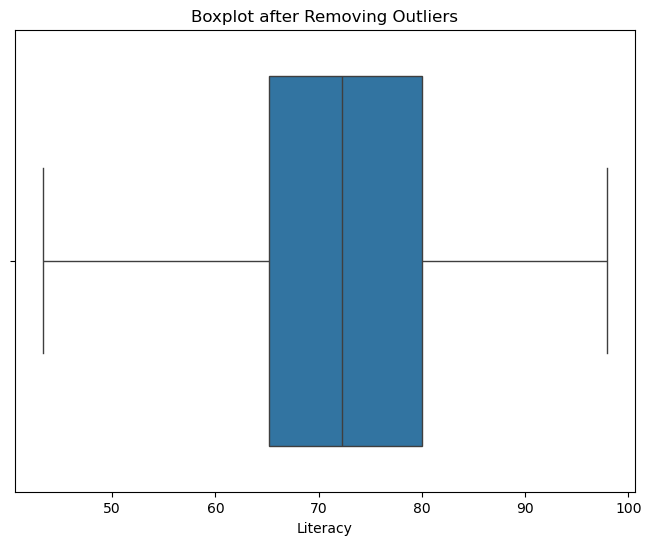

In [44]:
# Re-plot the boxplot for the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Literacy'])
plt.title('Boxplot after Removing Outliers')
plt.show()